In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

The title of this notebook is iris EDA notebook
essentially what we'll be doing is exploring the iris dataset to understand it (summary stats, distributions, correlations, anomalies) and documenting my findings

In [10]:
try:
    df = sns.load_dataset('iris')
except Exception:
    from sklearn.datasets import load_iris
    iris = load_iris(as_frame=True)
    df = iris.frame


df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


seaborn (sns) has a few built-in toy datasets for practice but sometimes seaborn fetches datasets online (from the seaborn-data repo). If you’re offline, it might fail. In that case you could use sklearn which never needs internet cause it’s built into scikit-learn.

In [12]:
print('shape:', df.shape)
print('\ninfo:')
print(df.info())


# Summary stats
df.describe()

shape: (150, 5)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The Iris dataset has 150 samples and 5 columns: 4 numeric features (sepal length, sepal width, petal length, petal width) and 1 categorical target (species).
All columns are complete (no missing values). The numeric features have reasonable ranges (e.g., petal length between 1–7 cm).

In [23]:
print(df.isnull().sum())


# Check unique class counts
print(df['species'].value_counts())
print(df['species'].value_counts(normalize=True))

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64


All columns are 0, so there are no missing values in the dataset.
There are 50 rows of each iris flower type meaning the dataset is balanced(no class dominates)
The proportion(percentage) of each class is 0.3, meaning 33.3% of the dataset belongs to that class.
Since all three are equal, the dataset is perfectly balanced.

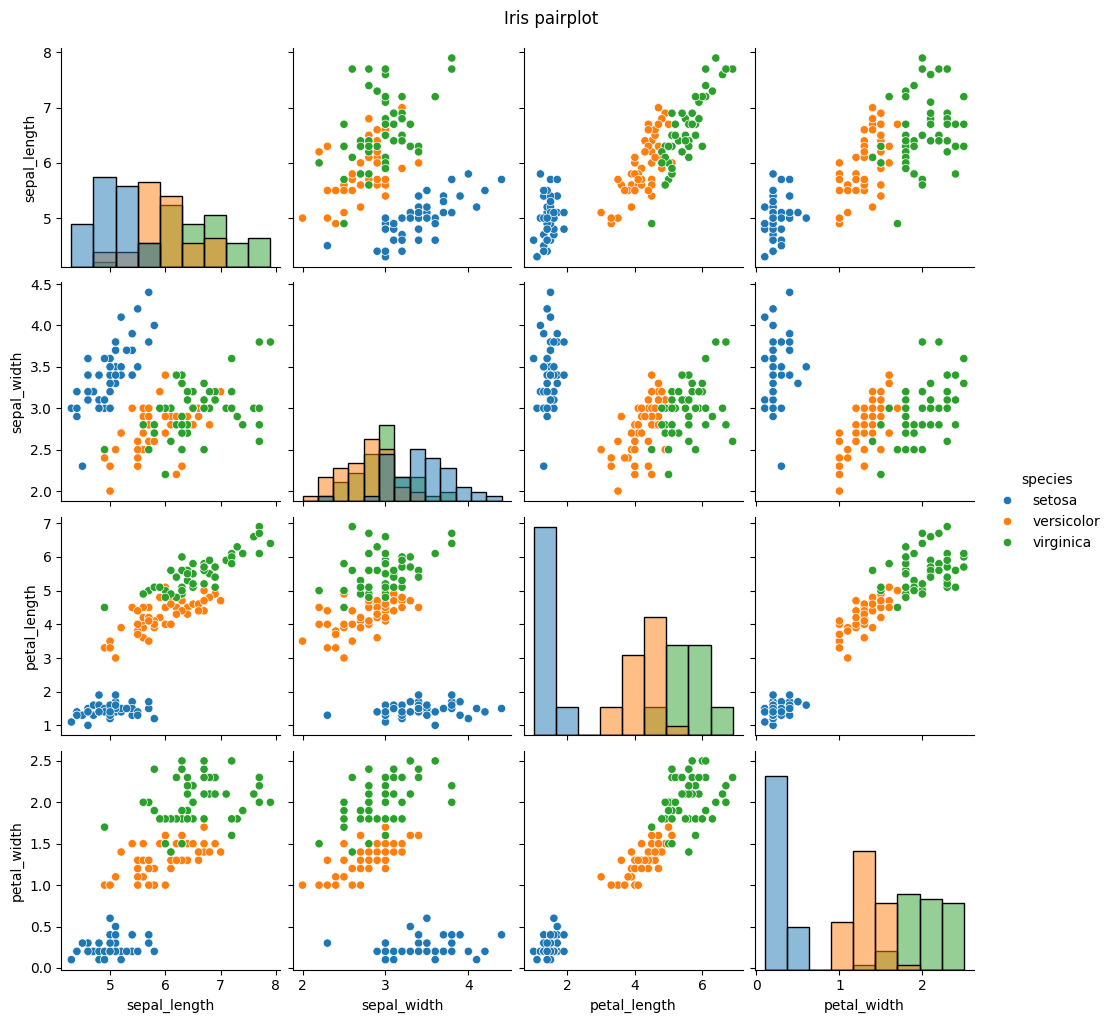

In [21]:
# Pairplot (classic Iris visualization)
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Iris pairplot', y=1.02)
plt.show()

## Observations from Pairplot

- **Balanced classes**: Each species (`setosa`, `versicolor`, `virginica`) has the same number of samples (50 each).
- **Setosa is clearly separable**:  
  - In scatterplots involving petal features (`petal_length`, `petal_width`), *setosa* forms a distinct cluster with no overlap.
- **Versicolor and Virginica overlap**:  
  - These two species show partial overlap, especially in `sepal_length` and `sepal_width`.
  - However, `petal_length` and `petal_width` help in separating them more effectively.
- **Most discriminative features**:  
  - `petal_length` and `petal_width` provide the clearest separation between classes.
  - `sepal_length` and `sepal_width` are less effective for classification.
- **Feature distributions**:  
  - Diagonal histograms show unimodal or multimodal distributions depending on the species.
  - `petal_length` histograms clearly display three distinct peaks, one per species.

## Weaknesses Observed

- **Class overlap**: Versicolor and Virginica are not perfectly separable, especially when considering only sepal features.Classifiers may misclassify them.
- **Feature limitations**: Sepal measurements show significant overlap and are poor predictors compared to petal features.Models trained on sepal features would perform poorly
- **Dataset size**: With only 150 total samples, the dataset is too small for testing more complex models.
- **Lack of real-world complexity**: The dataset is clean, balanced, and noise-free, which may not reflect the challenges of real-world data. Real-world biological data is usually messier, so this dataset may give an overly optimistic impression of model performance.
- **Low dimensionality**: Only 4 features are available, limiting opportunities for deeper feature engineering or dimensionality reduction.


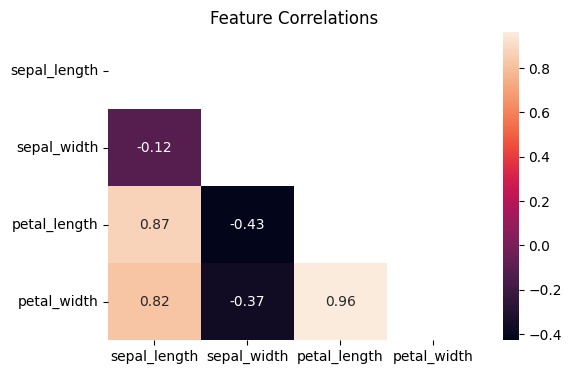

In [14]:
# Correlation heatmap (numeric only)
plt.figure(figsize=(6,4))
mask = np.triu(np.ones_like(df.select_dtypes(include=[np.number]).corr(), dtype=bool))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, mask=mask, fmt='.2f')
plt.title('Feature Correlations')
plt.show()

## Observations from Correlation Heatmap

- **Strong positive correlations**:
  - `petal_length` and `petal_width` (0.96) → almost perfectly correlated.
  - `sepal_length` and `petal_length` (0.87), `sepal_length` and `petal_width` (0.82) → strong positive relationships.
- **Weak or negative correlations**:
  - `sepal_width` shows weak/negative correlations with the other features (e.g., -0.37 with `petal_width`).
- **Feature redundancy**:
  - Since `petal_length` and `petal_width` are highly correlated, they provide similar information.  
    → In some models, one of them could be dropped to avoid redundancy.
- **Potential insights**:
  - Sepal measurements are less informative for distinguishing species compared to petal measurements.
  - Strong correlations among petal features confirm their importance in classification tasks.

### Conclusion
The heatmap highlights that **petal measurements drive most of the predictive power**, while sepal width contributes less.  
This complements the pairplot analysis, reinforcing that the **petal features are the most discriminative** for species classification.


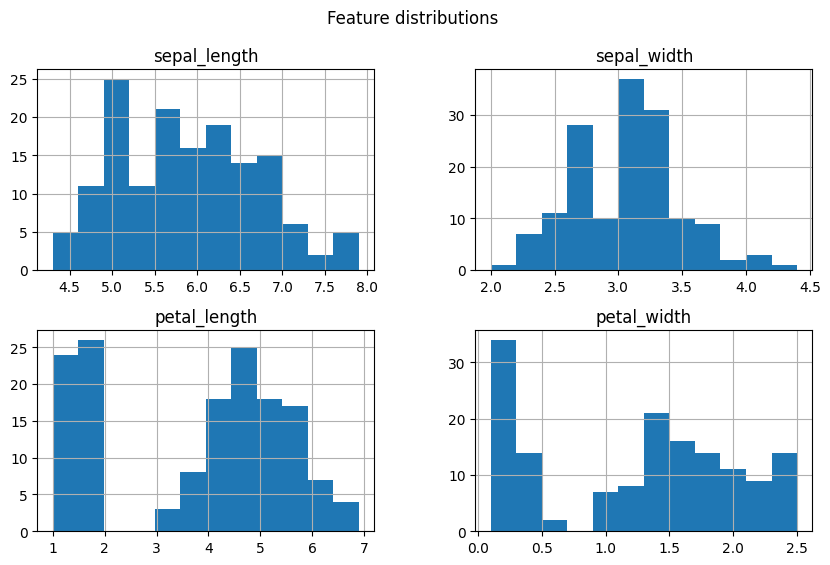

    sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa
[[0.17367395 3.09077525 1.2833891  1.05217993]]
outlier rows: 1


In [20]:
# Histograms
numeric = df.select_dtypes(include=[np.number]).columns
df[numeric].hist(bins=12, figsize=(10,6))
plt.suptitle('Feature distributions')
plt.show()


# Simple z-score outlier detection per feature
from scipy import stats
z = np.abs(stats.zscore(df[numeric]))
outliers = (z > 3).any(axis=1)
# Find the actual outlier rows
outlier_rows = df[outliers]
print(outlier_rows)
# Show z-scores for the outlier row(s)
print(z[outliers])
print('outlier rows:', outliers.sum())

## Outlier Detection

- Using z-score (>3), one outlier was detected:  
  - Sample index 15 (Setosa) with `sepal_width = 4.4`.  
- This is unusually wide compared to other Setosa flowers (mean ≈ 3.2).  
- The other features for this flower are within normal ranges.  

### Conclusion
This outlier likely reflects natural variation rather than a measurement error.  
So it’s an outlier in statistical terms, but not necessarily “bad data.”
Since the Iris dataset is small and well-curated, the row can safely be **kept** without negatively impacting analysis.
